仿射变换中的线性关系是一个很强的假设。它假设输入和输出之间的关系可以用一个线性函数来描述，这在很多实际应用中可能并不成立。

有些问题难以通过简单的预处理来解决。例如，图像分类任务中，图像的旋转、缩放、平移等变换可能会导致模型性能下降。对于这些问题，可能需要更复杂的模型来捕捉输入和输出之间的非线性关系。

我们可以通过在网络中加入一个或者多个隐藏层来增加模型的复杂度，从而更好地捕捉输入和输出之间的非线性关系。隐藏层可以通过非线性激活函数（如ReLU、sigmoid等）来实现非线性变换。

# RELU


C:\Users\z\AppData\Local\Temp\ipykernel_23784\1181339359.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-8.0, 8.0, 0.1,requires_grad=True)


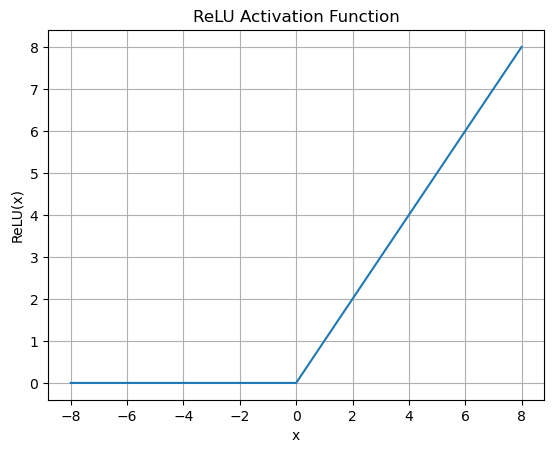

In [1]:
import torch
from matplotlib import pyplot as plt

from Chap3_Softmax import batch_size, train_iter

x = torch.arange(-8.0, 8.0, 0.1,requires_grad=True)
y = torch.relu(x)
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU Activation Function')
plt.grid()
plt.show()


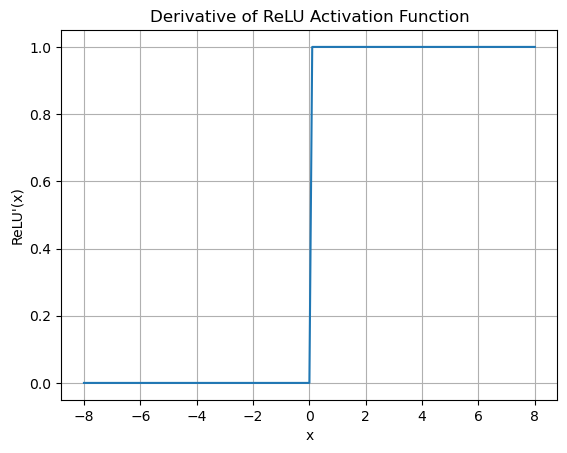

In [2]:
# 计算ReLU的导数，torch.ones_like(x)作为权重，表示对每个元素都求导，retain_graph=True表示保留计算图，允许后续再次反向传播。常用于可视化激活函数的导数。
y.backward(torch.ones_like(x),retain_graph=True)
plt.plot(x.detach().numpy(), x.grad.detach().numpy())
plt.xlabel('x')
plt.ylabel('ReLU\'(x)')
plt.title('Derivative of ReLU Activation Function')
plt.grid()
plt.show()

# Sigmoid

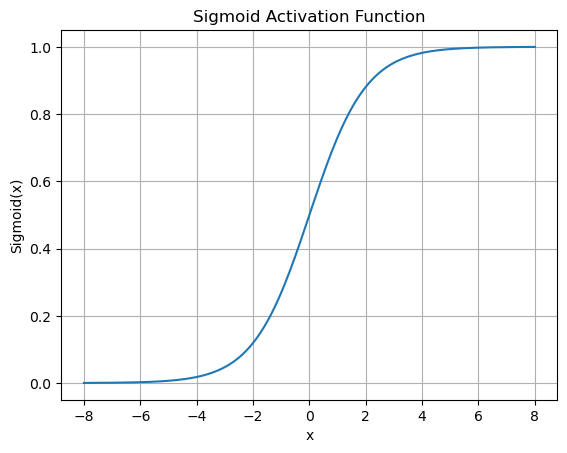

In [4]:
y = torch.sigmoid(x)
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Sigmoid Activation Function')
plt.grid()
plt.show()

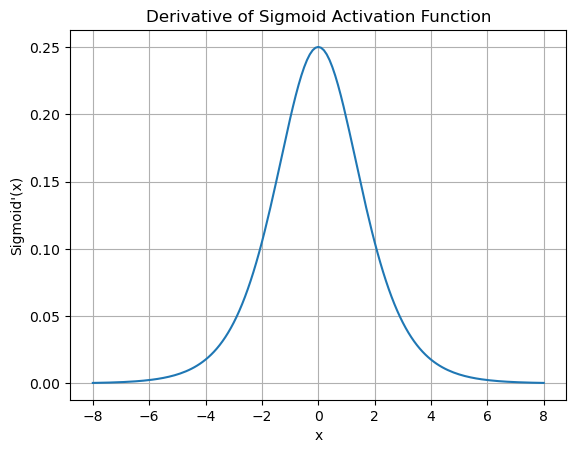

In [6]:
x.grad.zero_()  # 清除梯度
y.backward(torch.ones_like(x), retain_graph=True)
plt.plot(x.detach().numpy(), x.grad.detach().numpy())
plt.xlabel('x')
plt.ylabel('Sigmoid\'(x)')
plt.title('Derivative of Sigmoid Activation Function')
plt.grid()
plt.show()

# 多层感知机

In [ ]:
import softmax
import torch
from torch import nn
import matplotlib.pyplot as plt

# 定义多层感知机模型

batch_size = 256
train_iter,test_iter = softmax.load_data_fashion_mnist(batch_size)

num_inputs = 784  # 输入层大小
num_outputs = 10  # 输出层大小
num_hiddens = 256  # 隐藏层大小

W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens,requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens,requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs,requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs,requires_grad=True))

params = [W1, b1, W2, b2]

def relu(_X):
    a = torch.zeros_like(_X)
    return torch.max(_X, a)

def net(_X):
    X = _X.reshape((-1, num_inputs))
    H = relu(X @ W1 + b1)
    return H @ W2 + b2

loss = nn.CrossEntropyLoss(reduction='none')

num_epochs = 10
lr = 0.1
updater = torch.optim.SGD(params, lr=lr)

sm = softmax.SoftMax(draw=True)
sm.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)